<a href="https://colab.research.google.com/github/ismailyou/named_entity_reco/blob/main/Named_Enitity_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition - NER
[![Open Source](https://badges.frapsoft.com/os/v1/open-source.svg?v=103)](https://opensource.org/)

No algorithm can 100% identify all the named entities correctly

    Authors : 
    - JADID ISMAIL
    - LARHCHIM ZAKARIA
    Supervised by :
    - Pr. ABDELHAK MAHMOUDI


## THE PLAN :


1.   What does NER mean ?
2.   How NER works ?
3.   Why it is important?
3.   Named Entity Recognition use cases
4.   Load Dependencies
5.   Load Corpus
        -   Web Scraping using BeautifulSoup
        -   load to the drive
6.   Basic Named Entity (NE) tagging using NLTK
        -   Word Based
        -   Sentence Based
7.   More powerful package
        -   Stanford NLP NER
        -   Spacy
8.  The power of transformers
      - Bert-base-NER
      - French-camembert-postag-model
      - Tebyan-Arabic-Ner-Model
9.  Bidirectional LSTM 
    -   Inside–outside–beginning (tagging)
    -   data cleansing & validation
        -   English language
        -   Arabic & DARIJA
    -   Split data into train & test & validation sets 
    -   Build BiLSTM NER Model
    -   Train The Model
    -   Model Evaluation
        - Precision, Recall and F1-Score.
    -   How to improve Model Performance

## What does NER mean ?

Is the task of identifying and categorizing key information (entities) in text. An entity can be any word or series of words that consistently refers to the same thing. Every detected entity is classified into a predetermined category. For example, an NER machine learning (ML) model might detect the word “Google” in a text and classify it as a “Company”.

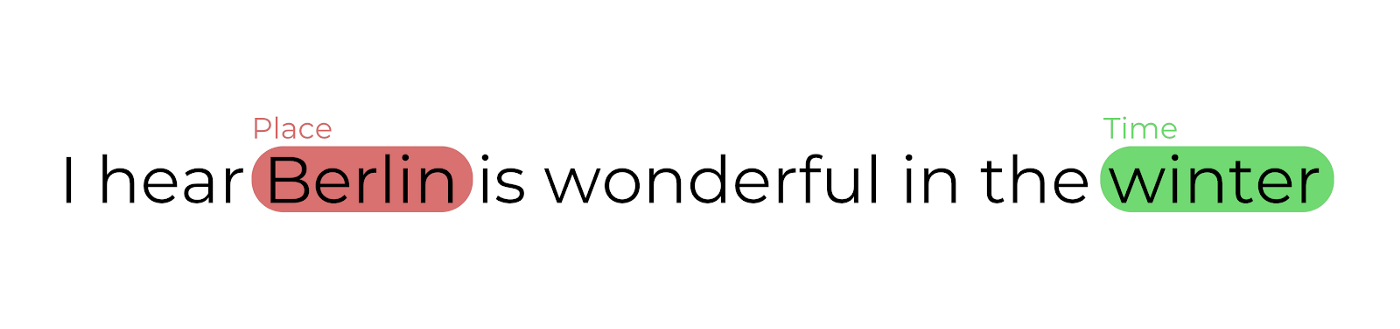

## How NER works ?

At the heart of any NER model is a two step process:
1.  Detect a named entity : this step involves detecting a word or string of words that form an entity. Each word represents a token. Inside-outside-beginning tagging is a common way of indicating where entities begin and end.

2.  Categorize the entity : This step requires the creation of entity categories. Here are some common entity categories:

These are just a few examples

  - **Person** 
  - **Organization** 
  - **Time**
  - **Location**
  - **Work of art**

## Why it is important ?

With NER, we can understand the subject or theme of a body of text and quickly group texts based on their relevancy or similarity.


<div class="alert alert-info">**Any NLP task which involves automatically understanding text and acts based on it, needs Named Entity Recognition in its pipeline**</div>



## Named Entity Recognition use cases

**`Wherever there are large quantities of text, NER can make life easier`**

* **Academia**
Enable students and researchers to find relevant material faster by summarizing papers and archive material and highlighting key terms, topics, and themes

* **Human resources** : Speed up the hiring process by summarizing applicants’ CVs.

* **Search and recommendation engines** : 
Improve the speed and relevance of search results and recommendations by summarizing descriptive text, reviews, and discussions.

* **Health care**
Improve patient care standards and reduce workloads by extracting essential information from lab reports
<br>[Roche](https://conferences.oreilly.com/strata/strata-ca-2019/public/schedule/detail/72568.html) is doing this with pathology and radiology reports

## Load Dependencies

We are using 
  - [NLTK](https://www.nltk.org/) provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming,
  - [SpaCy](https://spacy.io/) spaCy is an open-source Python library that parses and “understands” large volumes of text. 
  - [Stanford NER](https://nlp.stanford.edu/software/CRF-NER.shtml) is a Java implementation of a Named Entity Recognizer. Named Entity Recognition (NER) labels sequences of words in a text which are the names of things..

In [ ]:
import spacy
import nltk


print("SpaCy Version :", spacy.__version__)
print("nltk Version :", nltk.__version__)

SpaCy Version : 2.2.4
nltk Version : 3.2.5


## Load Corpus

### Web Scraping using Requests and BuetufulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

print("requests Version :", requests.__version__)

requests Version : 2.23.0


In [ ]:
urls = {
    "english" : "https://en.wikipedia.org/wiki/Morocco",
    "french" : "https://fr.wikipedia.org/wiki/Maroc",
    "arabic" : "https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D8%A8",
    "darija" : "https://ary.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D9%8A%D8%A8",
}

file = "/content/datas_{name}.txt"

for key in urls:
    print(key, 'language')
    s = requests.get(urls[key])

    data = s.text.encode("utf-8")

    soup = BeautifulSoup(data, "lxml")

    # heading = soup.find("h1", {"id": "firstHeading"})

    content = soup.findAll("p")

    file = "/content/data_"+ key +".txt"
    print("Creating : ", file)

    with open(file, "w+") as f:
      # f.write(str(heading.get_text())+ "\n")
      for i in content:
        f.write(i.get_text())


english language
Creating :  /content/data_english.txt
french language
Creating :  /content/data_french.txt
arabic language
Creating :  /content/data_arabic.txt
darija language
Creating :  /content/data_darija.txt


### Load to drive

upload the data to drive to feautur uses

In [224]:
from google.colab import drive

file_names = [
      "/content/data_english.txt", "/content/data_french.txt",
      "/content/data_arabic.txt", "/content/data_darija.txt"
]

drive.mount('/content/drive')
#path = '/content/drive/MyDrive/data/data_wiki.txt'
data = {}
prefix_path = "/content/drive/MyDrive"
for file in file_names:
  path = prefix_path + "" + file
  print("The content of ", path, "\n")
  with open(path, 'w') as fwrite:
    with open(file, "r") as fread:
      data[file[9: -4]] = fread.read()
    fwrite.write(data[file[9: -4]])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The content of  /content/drive/MyDrive/content/data_english.txt 

The content of  /content/drive/MyDrive/content/data_french.txt 

The content of  /content/drive/MyDrive/content/data_arabic.txt 

The content of  /content/drive/MyDrive/content/data_darija.txt 



### Data Cleansing

In [225]:
import re
def clean_data(text):
    text=text.encode("utf-8",errors='ignore').decode("utf-8")
    text=re.sub("https?:.*(?=\s)",'',text)
    text=re.sub("[’‘\"]","'",text)
    text=re.sub("[^\x00-\x7f]+",'',text)
    text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
    text=re.sub('\(.*?\)','',text)
    text=re.sub('\=\=.*?\=\=','',text)
    text=re.sub(' , ',',',text)
    text=re.sub(' \.','.',text)
    text=re.sub("  +",' ',text)
    text=re.sub(";",'and',text)
    return text.strip()

In [231]:
english_text = clean_data(data["data_english"])
french_text = clean_data(data["data_french"])
arabic_text = clean_data(data["data_arabic"])

In [232]:
french_text[:100]

'Pages pour les diteurs dconnects Royaume du Maroc 1 en arabe: 34 2 Nord 6 51 Ouestmodifier Le Maroc,'

In [233]:
arabic_text[:100]

'19 20 21 . 22 : . 6 19 23 24 25 26 . 27 . 6 45,44% 28 125 . 29 . 30 31 40 32 . 33 34 35 . 36 . 37 : '

#### Cleaning Arabic corpus

In [234]:
def clean_arabic(data):
  text = ''.join([i if ord(i) > 128 or i == '.' else ' ' for i in data])
  text = text.encode("utf-8",errors='ignore').decode("utf-8")
  text=re.sub("https?:.*(?=\s)",'',text)
  text=re.sub("[’‘\"]","'",text)
  text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
  text=re.sub('\(.*?\)','',text)
  text=re.sub('\=\=.*?\=\=','',text)
  text=re.sub(' , ',',',text)
  text=re.sub(' \.','.',text)
  text=re.sub("  +",' ',text)
  text=re.sub("(;|▲|\ufeff|°|ã|\u2002|é|É|è|«|»)",'',text)
  text=re.sub("[\xa0]",'',text)
  text = ' '.join([i for i in text.split() if len(i) > 1 or i == "."])
  return text

arabic_text = clean_arabic(data["data_arabic"])
len(arabic_text.split("."))

330

In [236]:
arabic_text = clean_arabic(data["data_arabic"])
darija_text = clean_arabic(data["data_darija"])

In [241]:
data["data_arabic"][:200]

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ (بالأمازيغية: ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ، تاكُلديت ن لمغريب) هي دولة إسلامية[19] تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على ا'

In [240]:
arabic_text[:200]

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ بالأمازيغية ⵜⴰⴳⵍⴷⵉⵜ ⵍⵎⵖⵔⵉⴱ، تاكُلديت لمغريب هي دولة إسلامية تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوس'

In [242]:
data = {
    "english" : english_text,
    "french" : french_text,
    "darija" : darija_text,
    "arabic" : arabic_text
}

prefix_path = "/content/drive/MyDrive/content/"
for file in data:
  path = prefix_path + "" + file + ".txt"

  print("The content of ", path, "\n")
  with open(path, 'w') as f:
    f.write(data[file])
    

The content of  /content/drive/MyDrive/content/english.txt 

The content of  /content/drive/MyDrive/content/french.txt 

The content of  /content/drive/MyDrive/content/darija.txt 

The content of  /content/drive/MyDrive/content/arabic.txt 



### Tokenizing

In [243]:
nltk.download('punkt')
english_text_words = nltk.word_tokenize(english_text)
english_text_sentences = nltk.sent_tokenize(english_text)

french_text_words = nltk.word_tokenize(french_text)
french_text_sentences = nltk.sent_tokenize(french_text)

arabic_text_words = nltk.word_tokenize(arabic_text)
arabic_text_sentences = nltk.sent_tokenize(arabic_text)

darija_text_words = nltk.word_tokenize(darija_text)
darija_text_sentences = nltk.sent_tokenize(darija_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Basic Named Entity (NE) tagging using NLTK

### Word Based

In [ ]:
print(len(english_text_words), "English tokens")
print(len(french_text_words), "French tokens")
print(len(arabic_text_words), "Arabic tokens")
print(len(darija_text_words), "Darija tokens")

13103 English tokens
40569 French tokens
8774 Arabic tokens
3888 Darija tokens


#### Part of speech tagging

In [244]:
nltk.download('averaged_perceptron_tagger')
english_pos_tags = nltk.pos_tag(english_text_words)
english_pos_tags[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Coordinates', 'NNS'),
 (':', ':'),
 ('.mw-parser-output.geo-default', 'NN'),
 (',', ','),
 ('.mw-parser-output.geo-dms', 'JJ'),
 (',', ','),
 ('.mw-parser-output.geo-dec', 'JJ'),
 ('display', 'NN'),
 (':', ':'),
 ('inline.mw-parser-output.geo-nondefault', 'NN')]

#### Detect only if the word is NE or Not

In [246]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
chunks = nltk.ne_chunk(english_pos_tags, binary=True) #either NE or not NE

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [247]:
import pandas as pd
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
      entities.append(' '.join(c[0] for c in chunk))
      labels.append(chunk.label())


entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:10]


,Entities,Labels
0,North Sea,NE
1,Polisario Front,NE
2,West African,NE
3,Rif Mountains,NE
4,Muhammad,NE
5,Northern Morocco,NE
6,Gnawa,NE
7,Eastern Mediterranean Region,NE
8,Qadi Ayyad,NE
9,SADR,NE


In [251]:
## Binary = False
chunks = nltk.ne_chunk(english_pos_tags, binary=False)

In [252]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:10]

,Entities,Labels
0,Frdric Deroche,PERSON
1,Protectorate,ORGANIZATION
2,Iberomaurusian,GPE
3,Jews,PERSON
4,Tingi,PERSON
5,Ifni,GPE
6,Fes,PERSON
7,Mansur,PERSON
8,Makc,PERSON
9,Paleolithic,GPE


we can see alot of problems with this model :

  - `New` => GPE
  - `El Jadida`  => PER


### Sentence Based

In [ ]:
print(len(english_text_sentences), "Sentences")
print(len(french_text_sentences), "Sentences")
print(len(arabic_text_sentences), "Sentences")
print(len(darija_text_sentences), "Sentences")

574 Sentences
1320 Sentences
327 Sentences
195 Sentences


In [253]:
english_sentences = []
arabic_sentences = []
french_sentences = []
darija_sentences = []

for sentence in english_text_sentences:
  english_sentences.append(nltk.word_tokenize(sentence))

for sentence in arabic_text_sentences:
  arabic_sentences.append(nltk.word_tokenize(sentence))


for sentence in french_text_sentences:
  french_sentences.append(nltk.word_tokenize(sentence))

for sentence in darija_text_sentences:
  darija_sentences.append(nltk.word_tokenize(sentence))


In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip'
!unzip stanford-tagger-4.2.0.zip
A

In [255]:
print(english_sentences[2])
print(arabic_sentences[2])
print(french_sentences[2])
print(darija_sentences[2])

['Morocco', 'also', 'claims', 'the', 'Spanish', 'exclaves', 'of', 'Ceuta', ',', 'Melilla', 'and', 'Pen', 'de', 'Vlez', 'de', 'la', 'Gomera', ',', 'and', 'several', 'small', 'Spanish-controlled', 'islands', 'off', 'its', 'coast', '.']
['المغرب', 'عضو', 'في', 'جامعة', 'الدول', 'العربية،', 'الاتحاد', 'من', 'أجل', 'المتوسط،', 'والاتحاد', 'الأفريقي؛', 'توجد', 'شراكة', 'استراتيجية', 'مع', 'مجلس', 'التعاون', 'الخليجي،', 'شراكة', 'اقتصادية', 'مع', 'الاتحاد', 'الأوروبي،', 'شراكة', 'عسكرية', 'مع', 'حلف', 'شمال', 'الأطلسي،', 'كما', 'يوجد', 'توجه', 'نحو', 'الاستثمار', 'بالبلدان', 'الأفريقية', '.']
['Sa', 'capitale', 'administrative', 'et', 'politique', 'est', 'Rabat', 'et', 'sa', 'plus', 'grande', 'ville', ',', 'ainsi', 'que', 'sa', 'capitale', 'conomique', ',', 'est', 'Casablanca', '.']
['لمدون', 'لكبار', 'لاخرين', 'ولمعروفين', 'هوما', 'فاس،', 'مراكش', 'سلا،', 'مكناس،', 'طنجة،', 'أݣادير،', 'آسفي،', 'تطوان،', 'وجدة،', 'بركان،', 'لعيون،', 'الحسيمة،', 'بني', 'ملال،', 'قنيطرة،', 'وارزازات', 'والداخلة

In [257]:
entities = []
labels = []

for sent in english_sentences:
    for chunk in nltk.ne_chunk(nltk.pos_tag(sent),binary=False):
        if hasattr(chunk,'label'):
            entities.append(' '.join(c[0] for c in chunk))
            labels.append(chunk.label())
            
entities_labels = list(set(zip(entities,labels)))

entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:10]

,Entities,Labels
0,Frdric Deroche,PERSON
1,Protectorate,ORGANIZATION
2,Iberomaurusian,GPE
3,Jews,PERSON
4,Tingi,PERSON
5,Ifni,GPE
6,Fes,PERSON
7,Mansur,PERSON
8,Makc,PERSON
9,Paleolithic,GPE


***English text : Now its more better than last time***



1.   `Lalla Khadija Bent Belkacem` -> PERSON
2.   `Ibn Khaldun	` -> PERSON
3.   `Kutubiyya Mosque` -> ORG

beautiful Aa :)

but we have a lot of problems also in other langs, French, arabic so we can import another pos tagger for every lang and try again.



## More powerful package

### Stanford NLP NER

**Installation and Configuration:**


https://medium.com/manash-en-blog/configuring-stanford-parser-and-stanford-ner-tagger-with-nltk-in-python-on-windows-f685483c374a

**Stanford link:**

https://nlp.stanford.edu/software/CRF-NER.html

#### Import Stanford Tagger

In [ ]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip


In [ ]:
st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [258]:
classified_text = st.tag(english_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:10]

,Entities,Labels
0,Coordinates,O
1,:,O
2,.mw-parser-output.geo-default,O
3,",",O
4,.mw-parser-output.geo-dms,O
5,.mw-parser-output.geo-dec,O
6,display,O
7,inline.mw-parser-output.geo-nondefault,O
8,.mw-parser-output.geo-multi-punct,O
9,none.mw-parser-output.longitude,O


In [259]:
classified_text_df[classified_text_df['Labels'] != 'O']

,Entities,Labels
17,Morocco,LOCATION
21,Kingdom,LOCATION
22,of,LOCATION
31,North,LOCATION
32,Africa,LOCATION
...,...,...
3528,Louardi,PERSON
3529,Ala,PERSON
3530,Alwan,PERSON
3534,Eastern,LOCATION


In [260]:
print("- English Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- English Tag Count : 4


O               3153
ORGANIZATION     157
LOCATION         153
PERSON           126
Name: Labels, dtype: int64

In [261]:
classified_text = st.tag(french_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:50]

classified_text_df[classified_text_df['Labels'] != 'O']

,Entities,Labels
5,Royaume,ORGANIZATION
6,du,ORGANIZATION
7,Maroc,ORGANIZATION
14,Nord,ORGANIZATION
17,Ouestmodifier,ORGANIZATION
...,...,...
8869,Merzouga,LOCATION
8874,Agnaou,PERSON
8876,Parc,ORGANIZATION
8877,Ligue,ORGANIZATION


In [262]:
print("- French Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- French Tag Count : 4


O               8136
PERSON           409
ORGANIZATION     194
LOCATION         154
Name: Labels, dtype: int64

In [264]:
netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)
        
        
entities_all = list(zip(entities, labels))
entities_unique = list(set(zip(entities, labels))) #unique entities   
entities_df = pd.DataFrame(entities_unique)
entities_df.columns = ["Entities", "Labels"]
entities_df.head()

,Entities,Labels
0,Abdallah ben Bologhin,PERSON
1,Ali,PERSON
2,Idrs Alaoma,PERSON
3,McDonald,ORGANIZATION
4,Louis Emberger,PERSON


### Spacy

In [ ]:
from spacy import displacy

# Perform standard imports 
english_nlp = spacy.load('en_core_web_sm')

!python -m spacy download fr_core_news_sm

import fr_core_news_sm
french_nlp = fr_core_news_sm.load()


In [265]:
print(english_text[:100])
print(french_text[:100])

Coordinates:.mw-parser-output.geo-default,.mw-parser-output.geo-dms,.mw-parser-output.geo-dec displa
Pages pour les diteurs dconnects Royaume du Maroc 1 en arabe: 34 2 Nord 6 51 Ouestmodifier Le Maroc,


#### Spacy : English text 

In [266]:
english_doc = english_nlp(english_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in english_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df.head()

,Entities,Labels,Position_Start,Position_End
0,"(nowrap, 32N)",CARDINAL,254,264
1,"(the, Kingdom, of, Morocco)",GPE,306,328
2,(Maghreb),GPE,371,378
3,"(North, Africa)",GPE,389,401
4,"(the, Mediterranean, Sea)",LOC,416,437


In [ ]:
french_doc = french_nlp(french_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in french_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
french_df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

In [270]:
displacy.render(english_doc[:200], style='ent', jupyter=True)

In [271]:
displacy.render(french_doc[:200], style='ent', jupyter=True)

In [272]:
arabic_doc = french_nlp(arabic_text)
displacy.render(arabic_doc[:200], style='ent', jupyter=True)

In [ ]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [ ]:
print("- French Tag Count :", len(french_df["Labels"].value_counts()))

french_df["Labels"].value_counts()

- French Tag Count : 4


LOC     1685
PER      600
MISC     397
ORG      377
Name: Labels, dtype: int64

In [ ]:
print("- English Tag Count :", len(df["Labels"].value_counts()))

df["Labels"].value_counts()

- English Tag Count : 17


GPE            403
CARDINAL       295
NORP           292
DATE           254
ORG            185
PERSON         163
LOC            122
ORDINAL         52
PERCENT         49
EVENT           18
LANGUAGE        17
PRODUCT         14
FAC             13
QUANTITY        10
MONEY            6
WORK_OF_ART      6
LAW              6
Name: Labels, dtype: int64

***Spacy works the best***

#### Viewing Specific Entities
You can pass a list of entity types to restrict the visualization:

#### SpaCy NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

#### Adding a Named Entity to a Span

<font color=green>Right now, spaCy does not recognize "Berber or Amazigh" as a nationality.``NORP``</font> 

In [ ]:
for i, j in enumerate(english_text_words):
  if j.lower() == "berber" or j.lower() == "berbers" or j.lower() == "amazigh":
    print (english_text_words[i-1], j, english_text_words[i+1])

of Berber ,
the Berber words
modern Berber name
between Berbers and
the Berber kingdom
by Berber tribes
indigenous Berber tribes
the Berber Revolt
the Berbers formed
Awraba Berber tribes
of Berber dynasties
a Berber uprising
the Berber people
ancient Berber ,
have Berber ancestral
and Berber .
The Berber language
12million Berber speakers
spoke Berber .
% Amazigh ,
its Berber ,
and Berber sites
from Berber culture
Moroccan Berber architecture
traditionally Berber or
the Berbers of
, Berber ,
or Berber .
, Berber and


#### Adding Named Entities to All Matching Spans

What if we want to tag all occurrences of "Berber"? 

In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
english_doc = english_nlp(english_text)
matcher = PhraseMatcher(english_nlp.vocab)

# Create the desired phrase patterns:
phrase_list = ['Berber', 'Berbers', 'berber', 'berbers', "Berber tribes", 'berber tribes', "amazigh", "Amazigh"]
phrase_patterns = [english_nlp(text) for text in phrase_list]

In [273]:
# Apply the patterns to our matcher object:
matcher.add('berber', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(english_doc)

# See what matches occur:
matches[2]

(16662550597105595156, 875, 876)

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

NORP = english_doc.vocab.strings[u'NORP']

new_ents = [] 
for match in matches:
  try:
    doc.ents = list(doc.ents) + [Span(doc, match[1],match[2],label=NORP)]
  except:
    pass

In [274]:
displacy.render(english_doc[:200], style='ent', jupyter=True)

## The power of transformers

### bert-base-NER :
bert-base-NER is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp_transformers = pipeline("ner", model=model, tokenizer=tokenizer)

In [296]:
ner_results = nlp_transformers(english_text)
print(ner_results[:10])
print(len(ner_results))

[{'entity': 'B-LOC', 'score': 0.9994126, 'index': 129, 'word': 'Morocco', 'start': 284, 'end': 291}, {'entity': 'B-LOC', 'score': 0.6543123, 'index': 134, 'word': 'Kingdom', 'start': 310, 'end': 317}, {'entity': 'B-LOC', 'score': 0.50058204, 'index': 136, 'word': 'Morocco', 'start': 321, 'end': 328}, {'entity': 'B-LOC', 'score': 0.70142084, 'index': 146, 'word': 'Ma', 'start': 371, 'end': 373}, {'entity': 'I-LOC', 'score': 0.8223884, 'index': 147, 'word': '##gh', 'start': 373, 'end': 375}, {'entity': 'I-LOC', 'score': 0.92641425, 'index': 148, 'word': '##re', 'start': 375, 'end': 377}, {'entity': 'B-LOC', 'score': 0.99852276, 'index': 152, 'word': 'North', 'start': 389, 'end': 394}, {'entity': 'I-LOC', 'score': 0.9983678, 'index': 153, 'word': 'Africa', 'start': 395, 'end': 401}, {'entity': 'B-LOC', 'score': 0.9990872, 'index': 160, 'word': 'Mediterranean', 'start': 420, 'end': 433}, {'entity': 'I-LOC', 'score': 0.99887973, 'index': 161, 'word': 'Sea', 'start': 434, 'end': 437}]
70


### French-camembert-postag-model
The french-camembert-postag-model is a part of speech tagging model for French that was trained on the free-french-treebank dataset available on [github](https://github.com/nicolashernandez/free-french-treebank). The base tokenizer and model used for training is 'camembert-base'.

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
!pip install --no-cache-dir transformers sentencepiece

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gilf/french-camembert-postag-model")
model = AutoModelForTokenClassification.from_pretrained("gilf/french-camembert-postag-model")

nlp_token_class = pipeline('ner', model=model, tokenizer=tokenizer, grouped_entities=True)

In [ ]:
nlp_token_class(french_text)

### Tebyan-Arabic-NER-Model

In [ ]:
m_name = "marefa-nlp/marefa-ner"
tokenizer = AutoTokenizer.from_pretrained(m_name)
model = AutoModelForTokenClassification.from_pretrained(m_name)

ar_ner = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True, aggregation_strategy="simple")

In [314]:
def _extract_ner(sent: str, ner: pipeline) -> list:
    grouped_ents = []
    current_ent = {}

    results = ner(sent)
    for ent in results:
        if len(current_ent) == 0:
            current_ent = ent
            continue

        if current_ent["end"] == ent["start"] and current_ent["entity_group"] == ent["entity_group"]:
            current_ent["word"] = current_ent["word"]+ent["word"]
        else:
            grouped_ents.append(current_ent)
            current_ent = ent

    if len(grouped_ents) > 0 and grouped_ents[-1] != ent:
        grouped_ents.append(current_ent)
    elif len(grouped_ents) == 0 and len(current_ent) > 0:
        grouped_ents.append(current_ent)

    return [ g for g in grouped_ents if len(g["word"].strip()) ]


In [ ]:
for sample in samples:
    ents = []
    ents = _extract_ner(sample, ar_ner)

    # print the results
    print("(", sample, ")")
    for ent in ents:
        print("\t", ent["word"], "=>", ent["entity_group"])
    print("=========\n")


( من الناحية الدبلوماسية، كتب الجنرال هوبير ليوطي الذي شغل منصب المقيم العام الفرنسي منذ حتى لقد وجدنا أنفسنا في المغرب أمام إمبراطورية عريقة تاريخيا ومستقلة، متمسكة إلى أقصى حد باستقلالها وشرسة في مواجهة أي محاولة لإخضاعها، وهي تظهر حتى هذه السنوات الأخيرة كدولة قائمة الذات بترتيبها الإداري الوظيفي وممثليها في الخارج. )

	  الجنر => job
	  هوبير ليوطي => person
	  المقيم العام => job
	  الفرنسي => nationality
	  منذ => time
	  المغرب => location

=========

( باتجاه الشرق، بدأت أولى الاتصالات مع الدولة العثمانية في القرن السادس عشر، حيث أصبح العثمانيون أقوياء جدا بعد سقوط تلمسان وسقوط الجزائر ثم الاستيلاء عليها مرة أخرى بصفة نهائية سنة مقتربين تدريجيا من مناطق نفوذ الدولة المغربية. )

	 الدولة العثمانية => organization
	 القرن السادس عشر => time
	 العثماني => nationality
	 تلمسان => event
	 الجزائر => location
	 سنة مقت => time
	 ربين => location
	 الدولة المغربية => location

In [ ]:
for sample in darija_samples:
    ents = []
    ents = _extract_ner(sample, ar_ner)

    # print the results
    print("(", sample, ")")
    for ent in ents:
        print("\t", ent["word"], "=>", ent["entity_group"])
    print("=========\n")

( لمغريب مديور فيه نضام ملكي من السلالة دلعلويين اللي فيه الملك محمد السادس هو اللي كايحكم لبلاد من عام مورا موت باه لحسن تاني، عندو دوستور توافقت عليه أغلبية كبيرة ومنها عندو برلامان كايصوتو الناس على لعضاوي ديالو. )

	 علو => nationality
	 الملك => job
	 محمد السادس => person
	 مورا موت => time
	 با => artwork
	 دوست => location
	 برلامان => location
	 كا => person
=========

( الرايس دلحكومة دلمغريب ليوما هو سعد الدين لعثماني لي كينتامي لحيزب لعدالة تنمية. )

	 راي => job
	 ريب  => person
	 سعد الدين لعثماني لي كينتامي لحيزب => person
=========

## Bidirectional LSTM

**Training**

- Collect a set of representative training example (documents)
- Annotate each token for its entity class or other (O) using **BIO** encoding scheme

- Feature engineering 
- Train a sequence tagger to predict the labels

**Test**

- Receive/Sample a set of test examples
- Run sequence model infrence to label each token
- Return the recognized entities

### Inside–outside–beginning (tagging)

Example:
<table>
  <td>Word</td>
  <td>Tag</td>
  <tr>
    <td>Alex </td>
    <td>I-PER</td>
  </tr>
    <tr>
    <td>is </td>
    <td>O</td>
  </tr>
    <tr>
    <td>going </td>
    <td>O</td>
  </tr>
  <tr>
    <td>to </td>
    <td>O</td>
  </tr>
  <tr>
    <td>Los </td>
    <td>I-Loc</td>
  </tr>
    <tr>
    <td>Angelos </td>
    <td>I-Loc</td>
  </tr>
      <tr>
    <td>in </td>
    <td>O</td>
  </tr>
      <tr>
    <td>Calefornia </td>
    <td>I-Loc</td>
  </tr>
</table>

In [275]:
import pandas as pd
print('pandas version :', pd.__version__)
import numpy as np
print('numpy version :', np.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

import tensorflow as tf
print('tensorflow version :', tf.__version__)

import sklearn
print("sklearn version :", sklearn.__version__)

pandas version : 1.1.5
numpy version : 1.19.5
tensorflow version : 2.6.0
sklearn version : 0.22.2.post1


### English language

#### Load The dataset

The dataset with 1M x 4 dimensions contains columns = ['# Sentence', 'Word', 'POS', 'Tag'] and is grouped by #Sentence.

URL : https://www.kaggle.com/namanj27/ner-dataset

In [ ]:
path = '/content/drive/MyDrive/data/ner_datasetreference.csv.zip'
data = pd.read_csv(path, encoding="unicode_escape")

#### Exploring The Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


NER dataset provided by kaggle. it consists of four columns

**Word**:
This column contains English dictionary words form the sentence it is taken from.

**POS**:
Parts of speech tag

**Tag**:
Standard named entity recognition tags as follows

- ORGANIZATION - Georgia-Pacific Corp., WHO

- PERSON - Eddy Bonte, President Obama

- LOCATION - Murray River, Mount Everest

- DATE - June, 2008-06-29

- TIME - two fifty a m, 1:30 p.m.

- MONEY - 175 million Canadian Dollars, GBP 10.40

- PERCENT - twenty pct, 18.75 %

- FACILITY - Washington Monument, Stonehenge

- GPE - South East Asia, Midlothian


In [ ]:
data.shape

(1048575, 4)

In [ ]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


#### Data Preprocessing

We will have to process the dataset in such a way that every sentence is one row and later tokenise and encode each sentence input

In [ ]:
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok

In [ ]:
token2idx, idx2token = get_dict_map(data, 'token')

tag2idx, idx2tag = get_dict_map(data, 'tag')

data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx)

In [ ]:
data_fillna = data.fillna(method='ffill', axis=0)

In [ ]:
# Groupby and collect columns
data_group = data_fillna.groupby(['Sentence #'],as_index=False).agg(lambda x: list(x))

In [276]:
data_group.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[20162, 18146, 18525, 34791, 1438, 3609, 25428...","[7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, ..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[32207, 6121, 12044, 4875, 1959, 3365, 11181, ...","[11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[24193, 15720, 8365, 32676, 2330, 3279, 8765, ...","[7, 7, 15, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 6,..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]","[19554, 29387, 1751, 32765, 22430, 13037, 1717...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[25080, 28263, 11718, 17334, 13616, 511, 2027,...","[9, 7, 7, 13, 12, 7, 15, 7, 9, 7, 11, 7, 11, 7..."


### Arabic & DARIJA

#### Load dataset

In [ ]:
!wget http://www.cs.cmu.edu/~ark/ArabicNER/AQMAR_Arabic_NER_corpus-1.0.zip
!unzip AQMAR_Arabic_NER_corpus-1.0.zip -d /content/arabic

#### All file in One

In [ ]:
import glob
# All files ending with .txt
files = glob.glob("/content/arabic/*.txt")

for i,f in enumerate(files):
  print("\n", i, f)

In [ ]:
path = "/content/arabic_ner.txt"

with open(path, "w+") as fout:
  for file in files:
    print("processing :", file)
    with open(file, "r") as fin:
      fout.write(fin.read())
   

#### Constructing dataframe

In [ ]:
data_ar = pd.read_csv(path, sep=' ',header=None, encoding="utf_8",engine='python', error_bad_lines=False)

In [ ]:
data_ar.rename(columns = {0:'Word', 1 : "Tag"}, inplace = True)

In [ ]:
len(data_ar)

63832

In [ ]:
data_ar.head()

,Word,Tag
0,العصر,B-MIS1
1,الذهبي,I-MIS1
2,للإسلام,O
3,تمتد,O
4,لغاية,O


#### Sentences construction

In [ ]:
i = 1
for idx, row in enumerate(data_ar["Word"]):
    if row == ".":
      sentence = "sentence " + str(i)
      i = i + 1
    else :
      sentence = "sentence " + str(i)

    data_ar.loc[idx, "sentence #"] = sentence

In [ ]:
data_ar[data_ar["Word"] == "O"]

,Word,Tag,sentence #
46293,O,B-MIS2,sentence 1455
48674,O,B-ENGLISH,sentence 1604
49867,O,O,sentence 1659
50585,O,O,sentence 1681


In [ ]:
data_ar['Word']=data_ar.Word.replace({"O": ""},regex=True)

In [ ]:
data_ar[data_ar["Word"] == "O"]

,Word,Tag,sentence #


In [ ]:
data_ar[data_ar["Word"].str.contains('\n')]

,Word,Tag,sentence #
137,\nحبر \nالعالم \nمساوي \nلدم \nالشهيد \n,O,sentence 5
2104,\nلينكس B-MIS1\n,O,sentence 66
3083,\ndistro \n,O,sentence 90
4086,\nسيقطع \nرونالدو B-PER\nلقطعتين \nوأنه \nسيص...,O,sentence 121
4452,\nلسنا \nفي \nحاجة \nإلى \nبيكهام B-PER\nبوجو...,O,sentence 127
...,...,...,...
59401,\nإجراءات \nوقائية \n,O,sentence 1988
60118,\nدمشقت \n,O,sentence 2007
63821,\nالمشاركة \nو \nالأخوة \nو \nالمساواة \nو \n...,O,sentence 2108
63824,"\n, \nكانت \nبداية \nإنطلاقة \nراؤول B-PER\nم...",O,sentence 2108


In [ ]:
data_ar['Word']=data_ar.Word.replace({"\n": ""},regex=True)

In [ ]:
data_ar[data_ar["Word"].str.contains('\n')]

,Word,Tag,sentence #


In [ ]:
data_ar["sentence #"].value_counts()

sentence 498     290
sentence 556     221
sentence 607     207
sentence 1342    187
sentence 601     186
                ... 
sentence 7         1
sentence 629       1
sentence 147       1
sentence 125       1
sentence 571       1
Name: sentence #, Length: 2108, dtype: int64

In [ ]:
data_ar.head()

,Word,Tag,sentence #
0,العصر,B-MIS1,sentence 1
1,الذهبي,I-MIS1,sentence 1
2,للإسلام,O,sentence 1
3,تمتد,O,sentence 1
4,لغاية,O,sentence 1


In [ ]:
ara_token2idx, ara_idx2token = get_dict_map(data_ar, 'token')

ara_tag2idx, ara_idx2tag = get_dict_map(data_ar, 'tag')

data_ar['Word_idx'] = data_ar['Word'].map(ara_token2idx)
data_ar['Tag_idx'] = data_ar['Tag'].map(ara_tag2idx)

In [ ]:
# Groupby and collect columns
data_ar_group = data_ar.groupby(['sentence #'],as_index=False).agg(lambda x: list(x))

In [277]:
data_ar_group.head()

,sentence #,Word,Tag,Word_idx,Tag_idx
0,sentence 1,"[العصر, الذهبي, للإسلام, تمتد, لغاية, القرن, ا...","[B-MIS1, I-MIS1, O, O, O, O, O, O, O, O, O, O, O]","[6632, 12870, 15818, 10315, 13507, 12844, 7638...","[6, 20, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23..."
1,sentence 10,"[كانت, العائلات, الحاكمة, الإسلامية, الأخرى, ف...","[O, B-PER, I-PER, I-PER, O, O, O, O, O, B-PER,...","[3815, 14525, 10734, 5077, 15323, 16154, 1358,...","[23, 18, 7, 7, 23, 23, 23, 23, 23, 18, 23, 1, ..."
2,sentence 100,"[بالرغم, من, انتشار, جنو, /, لينكس, خلال, السن...","[O, O, O, B-MIS1, O, B-MIS1, O, O, O, O, O, O,...","[7702, 8782, 15203, 5001, 5244, 8416, 862, 125...","[23, 23, 23, 6, 23, 6, 23, 23, 23, 23, 23, 23,..."
3,sentence 1000,"[إي, .]","[I-ORG, O]","[804, 13453]","[15, 23]"
4,sentence 1001,"[سي, و, هيوليت, -, باكرد, منتجات, تعتمد, على, ...","[I-ORG, O, B-ORG, I-ORG, I-ORG, O, O, O, B-MIS...","[4949, 8031, 12105, 10771, 838, 173, 6749, 146...","[15, 23, 10, 15, 15, 23, 23, 23, 6, 23]"


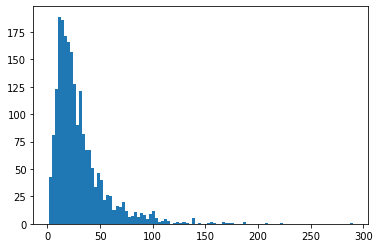

In [ ]:
plt.hist([len(sen) for sen in data_ar_group["Word"]], bins=100)
plt.show()

In [ ]:
len(data_ar)

63832

In [ ]:
len(data_ar_group)

2108

In [278]:
data_ar_group.head()

,sentence #,Word,Tag,Word_idx,Tag_idx
0,sentence 1,"[العصر, الذهبي, للإسلام, تمتد, لغاية, القرن, ا...","[B-MIS1, I-MIS1, O, O, O, O, O, O, O, O, O, O, O]","[6632, 12870, 15818, 10315, 13507, 12844, 7638...","[6, 20, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23..."
1,sentence 10,"[كانت, العائلات, الحاكمة, الإسلامية, الأخرى, ف...","[O, B-PER, I-PER, I-PER, O, O, O, O, O, B-PER,...","[3815, 14525, 10734, 5077, 15323, 16154, 1358,...","[23, 18, 7, 7, 23, 23, 23, 23, 23, 18, 23, 1, ..."
2,sentence 100,"[بالرغم, من, انتشار, جنو, /, لينكس, خلال, السن...","[O, O, O, B-MIS1, O, B-MIS1, O, O, O, O, O, O,...","[7702, 8782, 15203, 5001, 5244, 8416, 862, 125...","[23, 23, 23, 6, 23, 6, 23, 23, 23, 23, 23, 23,..."
3,sentence 1000,"[إي, .]","[I-ORG, O]","[804, 13453]","[15, 23]"
4,sentence 1001,"[سي, و, هيوليت, -, باكرد, منتجات, تعتمد, على, ...","[I-ORG, O, B-ORG, I-ORG, I-ORG, O, O, O, B-MIS...","[4949, 8031, 12105, 10771, 838, 173, 6749, 146...","[15, 23, 10, 15, 15, 23, 23, 23, 6, 23]"


In [281]:
ara_tag2idx

{'B-ENGLISH': 22,
 'B-LOC': 1,
 'B-MIS': 12,
 'B-MIS-1': 9,
 'B-MIS-2': 16,
 'B-MIS0': 24,
 'B-MIS1': 6,
 'B-MIS1`': 2,
 'B-MIS2': 3,
 'B-MIS3': 8,
 'B-MISS1': 19,
 'B-ORG': 10,
 'B-PER': 18,
 'B-SPANISH': 4,
 'I-LOC': 14,
 'I-MIS': 17,
 'I-MIS0': 0,
 'I-MIS1': 20,
 'I-MIS2': 5,
 'I-MIS3': 21,
 'I-ORG': 15,
 'I-PER': 7,
 'IO': 13,
 'O': 23,
 'OO': 11}

In [ ]:
data_ar.head()

,Word,Tag,sentence #,Word_idx,Tag_idx
0,العصر,B-MIS1,sentence 1,6632,6
1,الذهبي,I-MIS1,sentence 1,12870,20
2,للإسلام,O,sentence 1,15818,23
3,تمتد,O,sentence 1,10315,23
4,لغاية,O,sentence 1,13507,23


In [ ]:
data.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,NNS,O,20162,7
1,NaN,of,IN,O,18146,7
2,NaN,demonstrators,NNS,O,18525,7
3,NaN,have,VBP,O,34791,7
4,NaN,marched,VBN,O,1438,7


so now we'll proceed to train the neural network architecture of our model. let’s start by importing all the packages we need to train our neural network.

#### Train & test split

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
data_group.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[20162, 18146, 18525, 34791, 1438, 3609, 25428...","[7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, ..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[32207, 6121, 12044, 4875, 1959, 3365, 11181, ...","[11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[24193, 15720, 8365, 32676, 2330, 3279, 8765, ...","[7, 7, 15, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 6,..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]","[19554, 29387, 1751, 32765, 22430, 13037, 1717...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[25080, 28263, 11718, 17334, 13616, 511, 2027,...","[9, 7, 7, 13, 12, 7, 15, 7, 9, 7, 11, 7, 11, 7..."


In [ ]:
data_ar_group.head()

,sentence #,Word,Tag,Word_idx,Tag_idx
0,sentence 1,"[العصر, الذهبي, للإسلام, تمتد, لغاية, القرن, ا...","[B-MIS1, I-MIS1, O, O, O, O, O, O, O, O, O, O, O]","[6632, 12870, 15818, 10315, 13507, 12844, 7638...","[6, 20, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23..."
1,sentence 10,"[كانت, العائلات, الحاكمة, الإسلامية, الأخرى, ف...","[O, B-PER, I-PER, I-PER, O, O, O, O, O, B-PER,...","[3815, 14525, 10734, 5077, 15323, 16154, 1358,...","[23, 18, 7, 7, 23, 23, 23, 23, 23, 18, 23, 1, ..."
2,sentence 100,"[بالرغم, من, انتشار, جنو, /, لينكس, خلال, السن...","[O, O, O, B-MIS1, O, B-MIS1, O, O, O, O, O, O,...","[7702, 8782, 15203, 5001, 5244, 8416, 862, 125...","[23, 23, 23, 6, 23, 6, 23, 23, 23, 23, 23, 23,..."
3,sentence 1000,"[إي, .]","[I-ORG, O]","[804, 13453]","[15, 23]"
4,sentence 1001,"[سي, و, هيوليت, -, باكرد, منتجات, تعتمد, على, ...","[I-ORG, O, B-ORG, I-ORG, I-ORG, O, O, O, B-MIS...","[4949, 8031, 12105, 10771, 838, 173, 6749, 146...","[15, 23, 10, 15, 15, 23, 23, 23, 6, 23]"


In [ ]:
def get_pad_train_test_val(data_group, data, tag2idx = tag2idx):

  #Get The Lenght of word voacab
  n_token = len(list(set(data["Word"].to_list())))
  n_tag = len(list(set(data["Tag"].to_list())))

  #pad tokens
  tokens = data_group["Word_idx"].tolist()
  max_len = max([len(x) for x in tokens])

  pad_token = pad_sequences(tokens, maxlen=max_len, dtype="int32", padding="post", value=n_token - 1)

  #Pad Tags (y var) and convert it into one hot encoding
  tags = data_group["Tag_idx"].to_list()
  pad_tags = pad_sequences(tags, maxlen=max_len, dtype="int32", padding="post", value= tag2idx["O"])

  n_tags = len(tag2idx)
  pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]


  #Split train, test and validation set
  tokens_, test_tokens, tags_, test_tags = train_test_split(pad_token, pad_tags, test_size=0.1, random_state=67)
  train_tokens, val_tokens, train_tags, val_tags = train_test_split(test_tokens, test_tags, test_size=0.25, random_state=67)

  print(
      "train_tokens length : ", len(train_tokens),
      "\ntest_tokens length : ", len(test_tokens),
      "\ntest_tags length : ", len(test_tags),
      "\nval_tokens length : ", len(val_tokens),
      "\nval_tags length : ", len(val_tags),
  )

  return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

In [ ]:
print("Arabic Train & Test data")
train_tokens_ara, val_tokens_ara, test_tokens_ara, train_tags_ara, val_tags_ara, test_tags_ara = get_pad_train_test_val(data_ar_group, data_ar, ara_tag2idx)

Arabic Train & Test data
train_tokens length :  158 
test_tokens length :  211 
test_tags length :  211 
val_tokens length :  53 
val_tags length :  53


In [ ]:
train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(data_group, data)

train_tokens length :  3597 
test_tokens length :  4796 
test_tags length :  4796 
val_tokens length :  1199 
val_tags length :  1199


In [175]:
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

def get_params(data_group, data, tag2idx= tag2idx):

  vocab_len = len(list(set(data['Word'].to_list())))
  input_dim = vocab_len + 1

  lstm_units = 128
  output_dim = 128

  input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
  n_tags = len(tag2idx)
  print (
      "\nVacab : ",vocab_len,
      "\nInput dimensions  : " , input_dim,
      "\nOutput dimensions : " , output_dim,
      "\nInput lenght : " , input_length,
      "\n# Tags : " , n_tags,
  )
  return vocab_len, input_dim, output_dim, input_length, n_tags


In [176]:
 vocab_len, input_dim, output_dim, input_length, n_tags = get_params(data_group, data, tag2idx= tag2idx)


Vacab :  35178 
Input dimensions  :  35179 
Output dimensions :  128 
Input lenght :  104 
# Tags :  17


In [177]:
 ara_vocab_len, ara_input_dim, ara_output_dim, ara_input_length, ara_n_tags = get_params(data_ar_group, data_ar, ara_tag2idx)


Vacab :  16364 
Input dimensions  :  16365 
Output dimensions :  128 
Input lenght :  290 
# Tags :  25


Now, let us create layers that will take the dimensions of the LSTM layer and give the maximum length and maximum tags as output:

In [178]:
def create_model(input_dim, output_dim, input_length, n_tags):

  model = Sequential()

  # Add Embedding layer
  model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

  # Add bidirectional LSTM
  # model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))
  model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True), merge_mode = 'concat'))

  # Add LSTM
  model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

  # Add timeDistributed Layer
  # model.add(TimeDistributed(Dense(n_tags, activation="relu")))
  model.add(TimeDistributed(Dense(n_tags, activation="softmax")))

  #Optimiser 
  # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

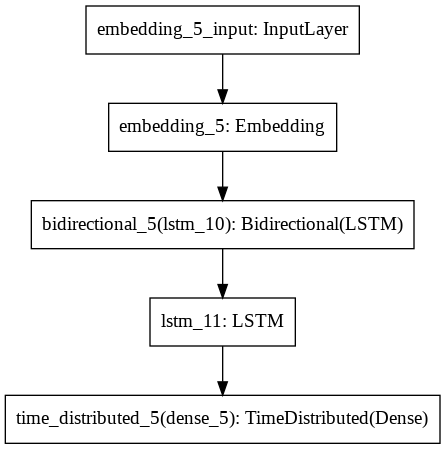

In [179]:
ner_model = create_model(input_dim, output_dim, input_length, n_tags)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 104, 128)          4502912   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 104, 256)          263168    
_________________________________________________________________
lstm_11 (LSTM)               (None, 104, 128)          197120    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 104, 17)           2193      
Total params: 4,965,393
Trainable params: 4,965,393
Non-trainable params: 0
_________________________________________________________________


In [180]:
ara_ner_model = create_model(ara_input_dim, ara_output_dim, ara_input_length, ara_n_tags)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 290, 128)          2094720   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 290, 256)          263168    
_________________________________________________________________
lstm_13 (LSTM)               (None, 290, 128)          197120    
_________________________________________________________________
time_distributed_6 (TimeDist (None, 290, 25)           3225      
Total params: 2,558,233
Trainable params: 2,558,233
Non-trainable params: 0
_________________________________________________________________


### Train The Model 

In [181]:
def train_model(X, y, model):
    loss = list()
    for i in range(25):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, verbose=1, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
    return loss

#### English Model training

  Training will take over 1hour ..

In [182]:
results = pd.DataFrame()
plot_model(ner_model)
results['with_add_lstm_english'] = train_model(train_tokens, np.array(train_tags), ner_model)

3/3 [==============================] - 33s 11s/step - loss: 0.1596 - accuracy: 0.9678 - val_loss: 0.1636 - val_accuracy: 0.9675


#### Arabic Model training

In [ ]:
plot_model(ara_ner_model)
results['with_add_lstm_arabic'] = train_model(train_tokens_ara, np.array(train_tags_ara), ara_ner_model)

1/1 [==============================] - 3s 3s/step - loss: 0.1454 - accuracy: 0.9889 - val_loss: 0.2708 - val_accuracy: 0.9819


In [ ]:
results

,with_add_lstm_english,with_add_lstm_arabic
0,5.178495,14.573286
1,0.998331,1.715167
2,0.699276,1.244681
3,0.476505,0.974490
4,0.404506,0.758066
5,0.392473,0.576070
6,0.379691,0.415179
7,0.355045,0.294363
8,0.321927,0.217772
9,0.313188,0.180973


In [ ]:
embedding_dim = 128
vocab_size = len(tokenizer.word_index)+1
lstm_units = 128

input_word = Input(shape=(max_len,))
model = Embedding(input_dim=vocab_size + 1, output_dim= embedding_dim, input_length=max_len)(input_word)

model = Bidirectional(LSTM(units=embedding_dim, return_sequences=True))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

### Model Evaluation
we will use the spacy library in Python to test our NER model

In [ ]:
preds = ner_model.predict(test_tokens)

In [ ]:
ara_preds = ara_ner_model.predict(test_tokens_ara)

In [167]:
def evaluatePredictions(test_data,preds,actual_preds):
    print("Shape of Test Data Array",test_data.shape)
    y_actual=np.argmax(np.array(actual_preds),axis=2)
    y_pred=np.argmax(preds,axis=2)
    num_test_data=test_data.shape[0]
    print("Number of Test Data Points ",num_test_data)
    data=pd.DataFrame()
    df_list=[]
    for i in range(num_test_data):
        test_str=list(test_data[i])
        df=pd.DataFrame()
        df['test_tokens']=test_str
        df['tokens']=df['test_tokens'].apply(lambda x: idx2token[x] if x!=0 else '<PAD>')
        df['actual_target_index']=list(y_actual[i])
        df['pred_target_index']=list(y_pred[i])
        df['actual_target_tag']=df['actual_target_index'].apply(lambda x: idx2tag[x])
        df['pred_target_tag']=df['pred_target_index'].apply(lambda x: idx2tag[x])
        df['id']=i+1
        df_list.append(df)
    data=pd.concat(df_list)
    pred_data=data[data['tokens']!='<PAD>']
    accuracy=pred_data[pred_data['actual_target_tag']==pred_data['pred_target_tag']].shape[0]/pred_data.shape[0]
    
    
    return pred_data,accuracy

In [168]:
pred_data,accuracy=evaluatePredictions(val_tokens,preds,val_tags)

Shape of Test Data Array (1199, 104)
Number of Test Data Points  1199


In [169]:
#ara_pred_data,ara_accuracy=evaluatePredictions(val_tokens_ara,ara_preds,val_tags_ara)

#### Precision, Recall and F1-Score.

In [170]:
y_pred=pred_data['pred_target_tag'].tolist()
y_actual=pred_data['actual_target_tag'].tolist()

In [171]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_actual,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00         7
       B-eve       0.00      0.00      0.00         5
       B-geo       0.00      0.00      0.00       900
       B-gpe       0.00      0.00      0.00       360
       B-nat       0.00      0.00      0.00         4
       B-org       0.00      0.00      0.00       477
       B-per       0.00      0.00      0.00       383
       B-tim       0.00      0.00      0.00       516
       I-art       0.00      0.00      0.00        12
       I-eve       0.00      0.00      0.00        12
       I-geo       0.00      0.00      0.00       170
       I-gpe       0.00      0.00      0.00        11
       I-nat       0.00      0.00      0.00         1
       I-org       0.00      0.00      0.00       391
       I-per       0.00      0.00      0.00       401
       I-tim       0.00      0.00      0.00       182
           O       0.97      1.00      0.98    120864

    accuracy              

The model has failed to learn tags other than "O", it has classified  each token as other. 
i think thats because the data is baised , (70% is labeled as "O")

In [282]:
pred_data.head()

,test_tokens,tokens,actual_target_index,pred_target_index,actual_target_tag,pred_target_tag,id
0,34146,Iran,9,7,B-geo,O,1
1,10075,has,7,7,O,O,1
2,14139,given,7,7,O,O,1
3,11728,reporters,7,7,O,O,1
4,32765,a,7,7,O,O,1


### How to improve Model Performance


- Using pre-trained word Embeddings.
- fine-tune existing model
- Use BERT transformers

**We can also make changes to the model hyperparameters like epochs, number of LSTM Units, Activation Function used etc**

## Printing Dependencies

In [ ]:
try :
  %load_ext watermark
except: 
  !pip install watermark

In [185]:
%load_ext watermark
%watermark --iversion

fr_core_news_sm: 2.2.5
pandas         : 1.1.5
matplotlib     : 3.2.2
spacy          : 2.2.4
numpy          : 1.19.5
requests       : 2.23.0
sklearn        : 0.0
tensorflow     : 2.6.0
IPython        : 5.5.0
nltk           : 3.2.5
google         : 2.0.3
re             : 2.2.1

